# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [166]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [168]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [169]:
df.insert(3,'CarBrand',df['CarName'].apply(lambda i: i.split(' ')[0]))
df.drop(['CarName'],inplace=True,axis=1)
df

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


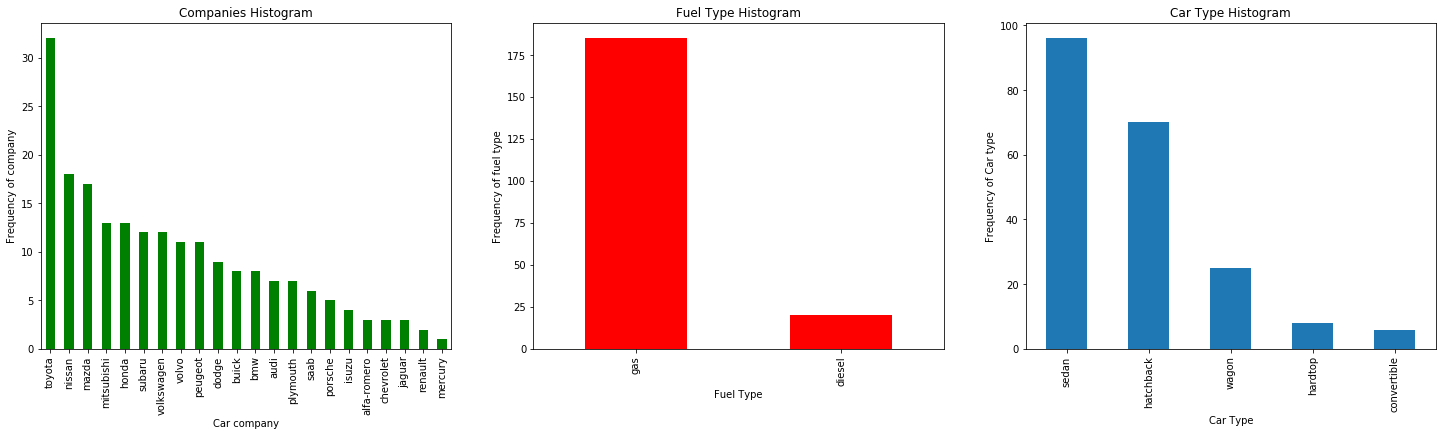

In [170]:
df['CarBrand'] = df['CarBrand'].str.lower()

def corr_spell(x,y):
    df['CarBrand'].replace(x,y,inplace=True)

corr_spell('maxda','mazda')
corr_spell('porcshce','porsche')
corr_spell('toyouta','toyota')
corr_spell('vokswagen','volkswagen')
corr_spell('vw','volkswagen')

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CarBrand.value_counts().plot(kind='bar',color='g')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar',color='r')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


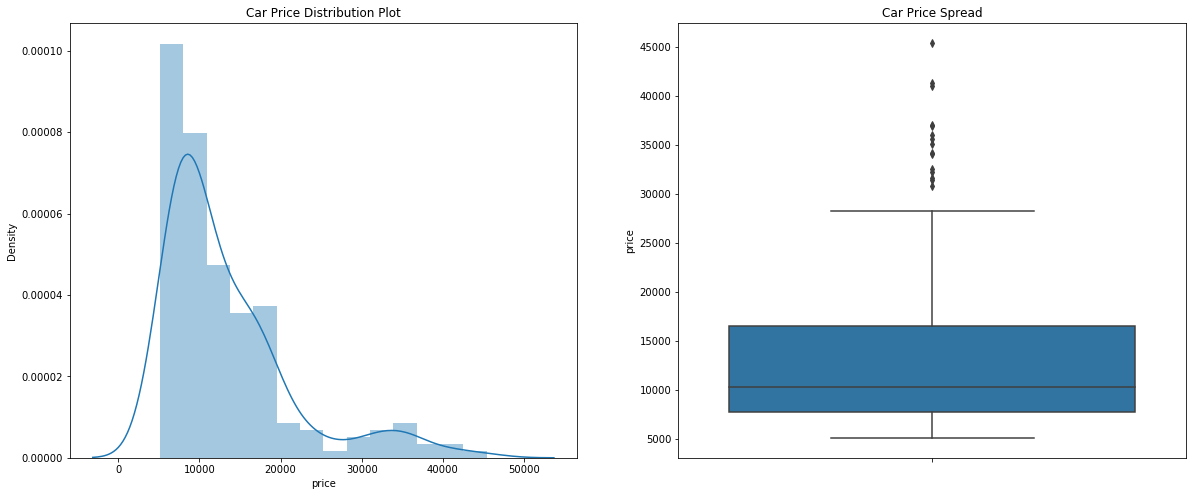

In [171]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [172]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


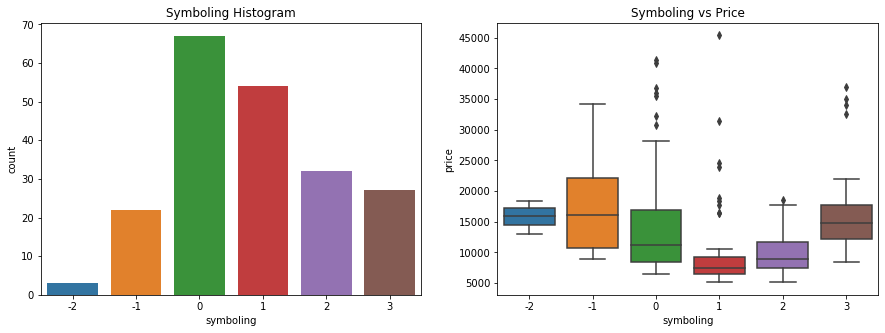

In [173]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling)                 

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(df.symboling, df.price)     

plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


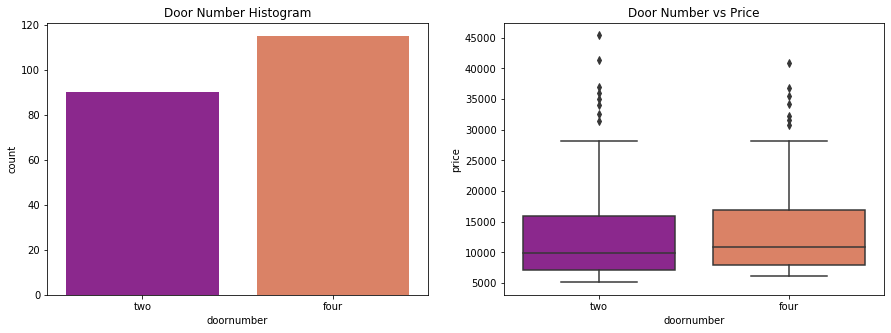

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


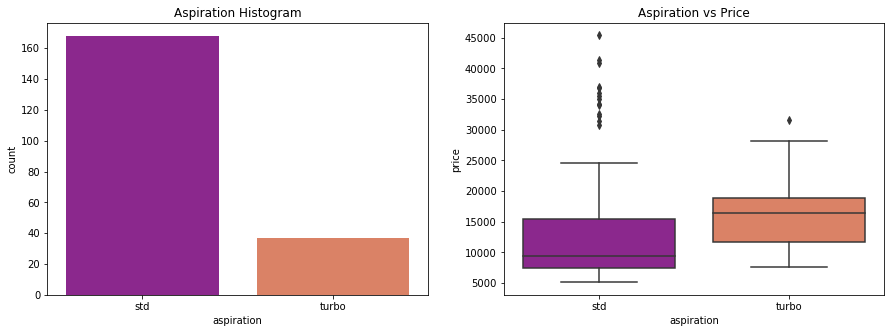

In [174]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Program Files\Anaconda\lib\s

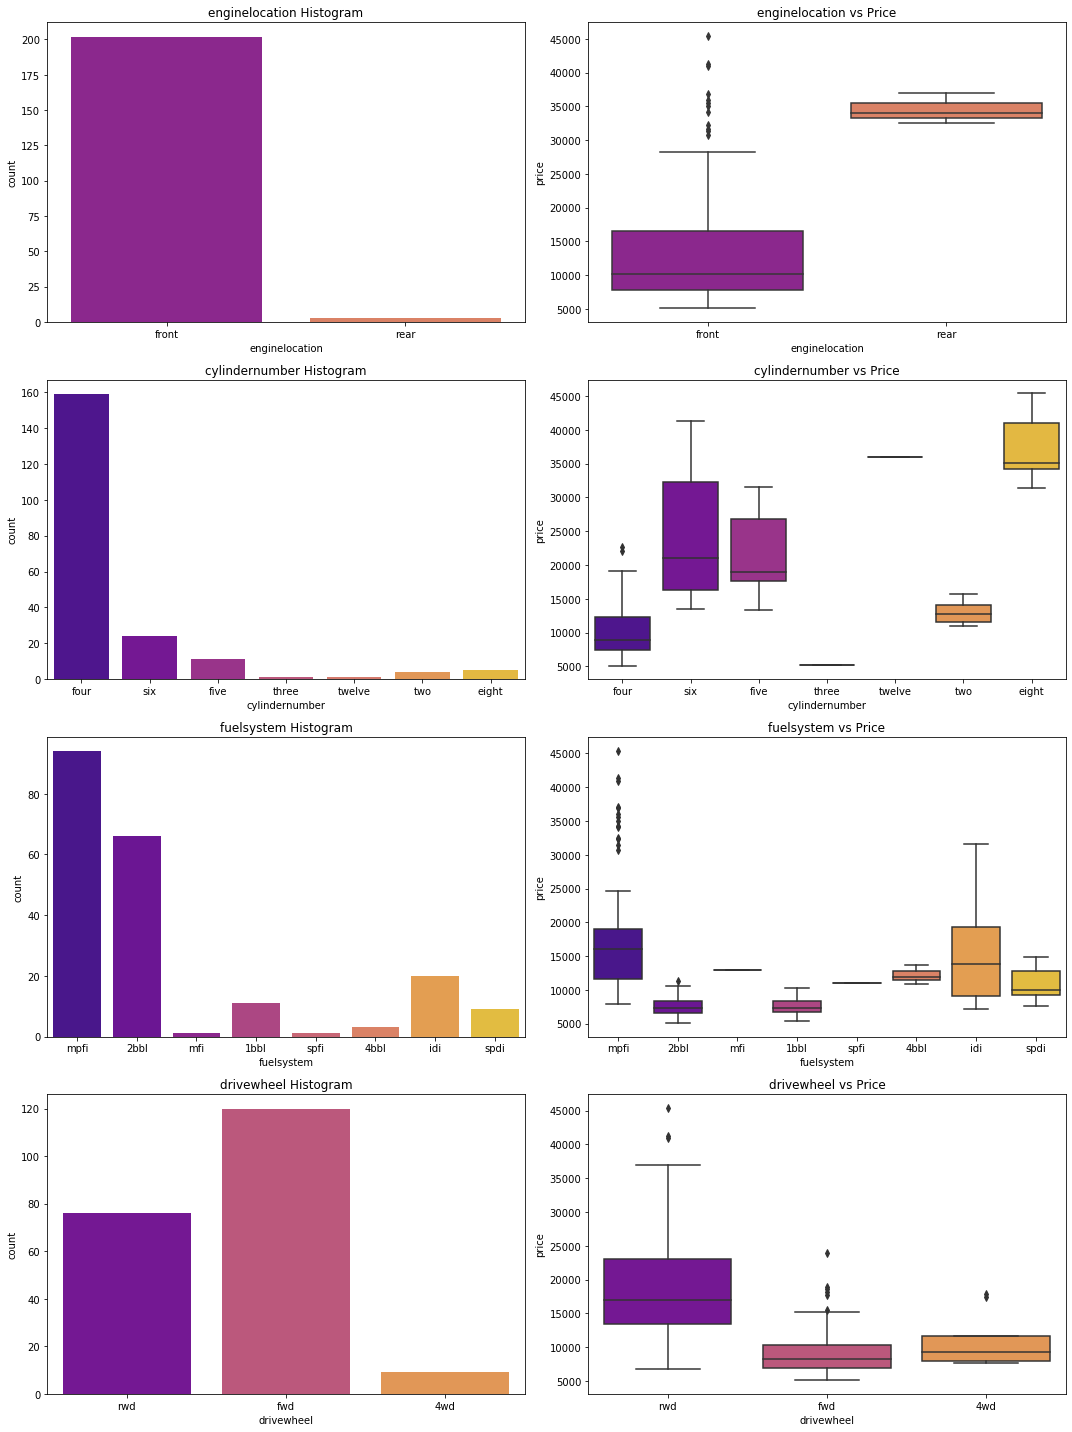

In [175]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("plasma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("plasma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

C:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


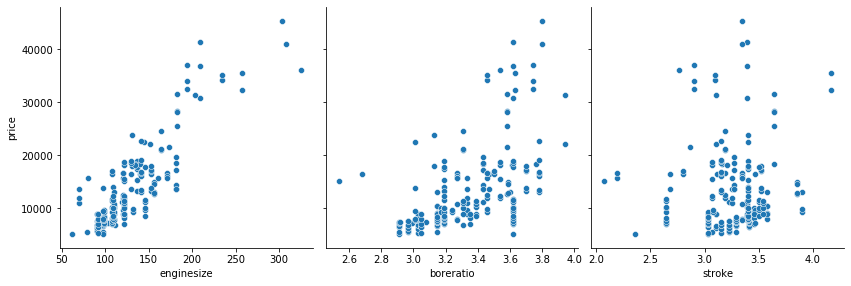

C:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


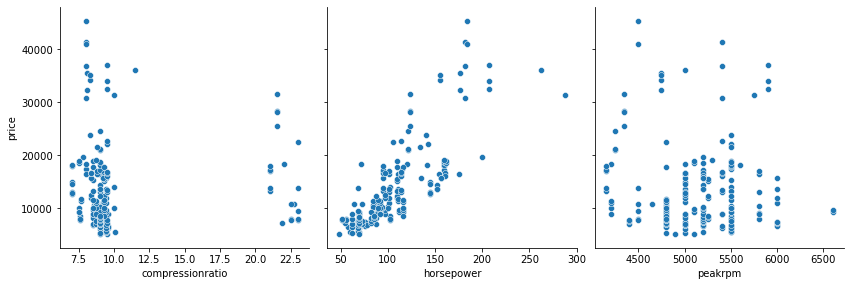

C:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


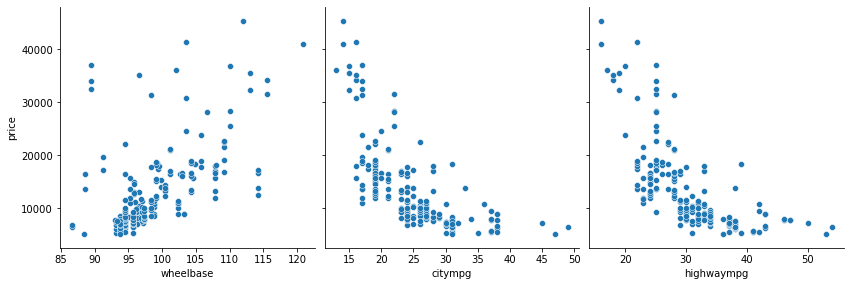

C:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


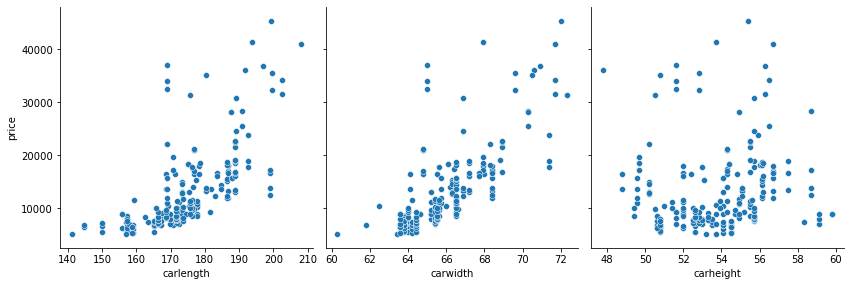

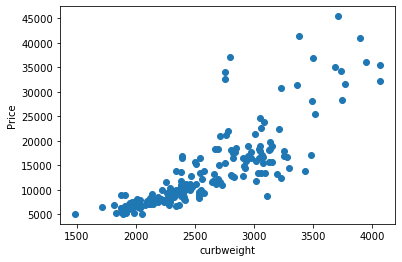

In [176]:
def pair_plot(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')
pair_plot('carlength','carwidth','carheight')

plt.scatter(df['curbweight'],df['price'])
plt.ylabel('Price')
plt.xlabel('curbweight')
plt.show()

In [177]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CarBrand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarBrand')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


In [178]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [179]:
df.drop(labels=['car_ID','symboling','CarBrand','doornumber','carheight','enginelocation','fuelsystem','compressionratio','stroke','peakrpm', 'citympg', 'highwaympg'],axis=1,inplace=True)
df

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,CarsRange,fueleconomy
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Medium,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Medium,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Medium,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Medium,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Medium,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845,Medium,25.25
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045,Medium,21.70
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485,Medium,20.25
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470,Medium,26.45


In [180]:
temp = pd.get_dummies(df[['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','CarsRange']])
df = pd.concat([df,temp],axis=1)
df.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','CarsRange'], axis = 1, inplace = True)
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,13495,23.70,0,...,0,0,1,0,0,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500,23.70,0,...,0,0,1,0,0,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500,22.15,0,...,0,0,0,1,0,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950,26.70,0,...,0,0,1,0,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450,19.80,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845,25.25,0,...,0,0,1,0,0,0,0,0,1,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045,21.70,0,...,0,0,1,0,0,0,0,0,1,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485,20.25,0,...,0,0,0,1,0,0,0,0,1,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470,26.45,1,...,0,0,0,1,0,0,0,0,1,0


In [181]:
df['CarsRange_Highend'].value_counts()

0    181
1     24
Name: CarsRange_Highend, dtype: int64

In [182]:
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,13495,23.70,0,...,0,0,1,0,0,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500,23.70,0,...,0,0,1,0,0,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500,22.15,0,...,0,0,0,1,0,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950,26.70,0,...,0,0,1,0,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450,19.80,0,...,0,1,0,0,0,0,0,0,1,0


In [183]:
df = shuffle(df,random_state=157).astype('float32')

In [184]:
train_data = df[:int(0.5*len(df))+1]
val_data = df[int(0.5*len(df))+1:int(0.7*len(df))+1]
test_data = df[int(0.7*len(df))+1:]
train_data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
40,96.500000,175.399994,62.500000,2372.0,110.0,3.15,86.0,10295.0,29.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110,114.199997,198.899994,68.400002,3430.0,152.0,3.70,95.0,13860.0,25.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180,104.500000,187.800003,66.500000,3131.0,171.0,3.27,156.0,15690.0,21.799999,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38,96.500000,167.500000,65.199997,2289.0,110.0,3.15,86.0,9095.0,29.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,98.800003,177.800003,66.500000,2410.0,122.0,3.39,84.0,10245.0,28.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,97.300003,171.699997,65.500000,2209.0,109.0,3.19,85.0,7975.0,30.150000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,99.800003,176.600006,66.199997,2337.0,109.0,3.19,102.0,13950.0,26.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,115.599998,202.600006,71.699997,3770.0,183.0,3.58,123.0,31600.0,23.350000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71,115.599998,202.600006,71.699997,3740.0,234.0,3.46,155.0,34184.0,16.900000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
train_data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
40,96.500000,175.399994,62.500000,2372.0,110.0,3.15,86.0,10295.0,29.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110,114.199997,198.899994,68.400002,3430.0,152.0,3.70,95.0,13860.0,25.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180,104.500000,187.800003,66.500000,3131.0,171.0,3.27,156.0,15690.0,21.799999,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38,96.500000,167.500000,65.199997,2289.0,110.0,3.15,86.0,9095.0,29.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,98.800003,177.800003,66.500000,2410.0,122.0,3.39,84.0,10245.0,28.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,97.300003,171.699997,65.500000,2209.0,109.0,3.19,85.0,7975.0,30.150000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,99.800003,176.600006,66.199997,2337.0,109.0,3.19,102.0,13950.0,26.700001,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,115.599998,202.600006,71.699997,3770.0,183.0,3.58,123.0,31600.0,23.350000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71,115.599998,202.600006,71.699997,3740.0,234.0,3.46,155.0,34184.0,16.900000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
scaler = StandardScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
val_data[num_vars] = scaler.transform(val_data[num_vars])
test_data[num_vars] = scaler.transform(test_data[num_vars])

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:2966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [187]:
train_targets = train_data['price']
train_data = train_data.drop('price',axis=1)
val_targets = val_data['price']
val_data = val_data.drop('price',axis=1)
test_targets = test_data['price']
test_data = test_data.drop('price',axis=1)
train_data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,fueltype_diesel,fueltype_gas,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
40,-0.382386,0.104500,-1.526952,-0.304375,-0.394592,-0.639846,-0.425206,0.236370,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110,2.400560,1.985120,1.141811,1.617795,0.536163,1.418490,-0.183089,-0.462418,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180,0.875443,1.096828,0.282379,1.074573,0.957219,-0.190755,1.457924,-0.938189,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38,-0.382386,-0.527708,-0.305655,-0.455169,-0.394592,-0.639846,-0.425206,0.236370,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,-0.020760,0.296564,0.282379,-0.235337,-0.128662,0.258337,-0.479010,0.087691,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.256603,-0.191597,-0.169954,-0.600513,-0.416753,-0.490149,-0.452108,0.303275,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.136469,0.200533,0.146677,-0.367963,-0.416753,-0.490149,0.005224,-0.209665,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,2.620681,2.281219,2.634507,2.235506,1.223149,0.969398,0.570163,-0.707737,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71,2.620681,2.281219,2.634507,2.181002,2.353352,0.520307,1.431023,-1.666712,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
train_data.shape[1]

37

In [189]:
def build_model():
    model = Sequential()
    model.add(Dense(28, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [190]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

#num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
train_targets = np.asarray(train_targets)
val_data = np.asarray(val_data)
val_targets = np.asarray(val_targets)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [191]:
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs,verbose=1)

Train on 78 samples, validate on 25 samples
Epoch 1/100
78/78 [==============================] - 1s 15ms/sample - loss: 1.0323 - mae: 0.7168 - val_loss: 0.8592 - val_mae: 0.6974
Epoch 2/100
78/78 [==============================] - 0s 722us/sample - loss: 1.0109 - mae: 0.7023 - val_loss: 0.8332 - val_mae: 0.6850
Epoch 3/100
78/78 [==============================] - 0s 718us/sample - loss: 0.9886 - mae: 0.6881 - val_loss: 0.8160 - val_mae: 0.6749
Epoch 4/100
78/78 [==============================] - 0s 667us/sample - loss: 0.9698 - mae: 0.6757 - val_loss: 0.8038 - val_mae: 0.6673
Epoch 5/100
78/78 [==============================] - 0s 683us/sample - loss: 0.9508 - mae: 0.6643 - val_loss: 0.7944 - val_mae: 0.6601
Epoch 6/100
78/78 [==============================] - 0s 731us/sample - loss: 0.9302 - mae: 0.6522 - val_loss: 0.7799 - val_mae: 0.6506
Epoch 7/100
78/78 [==============================] - 0s 667us/sample - loss: 0.9114 - mae: 0.6399 - val_loss: 0.7531 - val_mae: 0.6373
Epoch 8/100


Epoch 61/100
78/78 [==============================] - 0s 667us/sample - loss: 0.0178 - mae: 0.1039 - val_loss: 0.1357 - val_mae: 0.2600
Epoch 62/100
78/78 [==============================] - 0s 795us/sample - loss: 0.0171 - mae: 0.1025 - val_loss: 0.1362 - val_mae: 0.2601
Epoch 63/100
78/78 [==============================] - 0s 731us/sample - loss: 0.0168 - mae: 0.1018 - val_loss: 0.1372 - val_mae: 0.2608
Epoch 64/100
78/78 [==============================] - 0s 628us/sample - loss: 0.0164 - mae: 0.1008 - val_loss: 0.1362 - val_mae: 0.2589
Epoch 65/100
78/78 [==============================] - 0s 654us/sample - loss: 0.0155 - mae: 0.0984 - val_loss: 0.1379 - val_mae: 0.2610
Epoch 66/100
78/78 [==============================] - 0s 987us/sample - loss: 0.0151 - mae: 0.0976 - val_loss: 0.1407 - val_mae: 0.2639
Epoch 67/100
78/78 [==============================] - 0s 1ms/sample - loss: 0.0148 - mae: 0.0967 - val_loss: 0.1413 - val_mae: 0.2637
Epoch 68/100
78/78 [==============================

In [192]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [193]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [194]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [195]:
average_mae_history[-1]

0.26018035

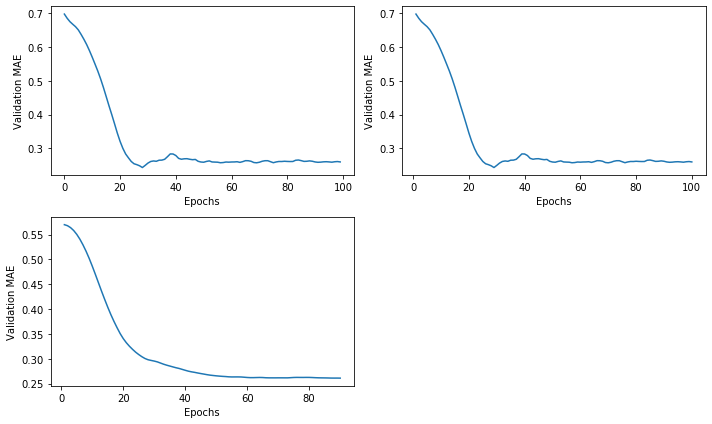

In [196]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,2)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,3)
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.tight_layout()
plt.show()

In [197]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=20, batch_size=16, verbose=0)

In [198]:
test_mse_score, test_mae_score = model.evaluate(test_data.values, test_targets.values)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [199]:
scaled = model.predict(test_data)
(scaled*scaler.scale_)+scaler.mean_

array([[1.09784829e+02, 3.47875305e+03, 2.04805148e+02, 3.77692302e+00,
        1.65235231e+02, 3.95871207e+01, 1.95416759e+02, 6.96481051e+01,
        2.74340810e+04],
       [9.44231319e+01, 2.14932544e+03, 9.58156384e+01, 3.13154072e+00,
        7.54534048e+01, 2.33419836e+01, 1.65235481e+02, 6.43084538e+01,
        7.10846022e+03],
       [1.02511225e+02, 2.84928290e+03, 1.53199748e+02, 3.47134121e+00,
        1.22724470e+02, 3.18952172e+01, 1.81126238e+02, 6.71198357e+01,
        1.78101109e+04],
       [1.05481591e+02, 3.10634346e+03, 1.74274160e+02, 3.59613352e+00,
        1.40084848e+02, 3.50364067e+01, 1.86962145e+02, 6.81523205e+01,
        2.17403102e+04],
       [9.72381185e+01, 2.39293920e+03, 1.15787651e+02, 3.24980516e+00,
        9.19056644e+01, 2.63188579e+01, 1.70766113e+02, 6.52869295e+01,
        1.08330714e+04],
       [9.49817581e+01, 2.19766990e+03, 9.97790282e+01, 3.15500996e+00,
        7.87183096e+01, 2.39327359e+01, 1.66333019e+02, 6.45026296e+01,
        7.8

In [200]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df


In [201]:
inv = undummify(test_data)

In [202]:
inv

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,CarsRange
68,1.740200,1.344909,2.001244,2.199170,1.223149,0.969398,0.570163,-0.707737,diesel,turbo,wagon,rwd,ohc,five,Highend
36,-0.382386,-1.359982,-0.893686,-0.936620,-0.793487,-1.500606,-0.694225,0.548594,gas,std,wagon,fwd,ohc,four,Budget
4,0.073577,0.200533,0.237146,0.516817,0.181590,-0.490149,0.354948,-1.235545,gas,std,sedan,4wd,ohc,five,Medium
104,-1.199975,-0.271624,0.915645,0.965565,1.178827,0.408034,1.565532,-0.953056,gas,std,hatchback,rwd,ohcv,six,Medium
193,0.230806,0.720704,0.463312,0.042633,-0.416753,-0.490149,-0.371402,-0.060987,gas,std,wagon,fwd,ohc,four,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.508170,-0.623739,-0.667519,-0.758574,-0.660522,-0.490149,-0.855636,0.385048,gas,std,hatchback,fwd,ohc,four,Budget
66,0.938335,0.072490,0.101445,0.291534,0.137268,0.408034,-0.801832,0.964893,diesel,std,sedan,rwd,ohc,four,Medium
31,-1.938950,-2.360312,-0.893686,-1.309063,-0.793487,-1.538030,-0.694225,0.897988,gas,std,hatchback,fwd,ohc,four,Budget
51,-0.916964,-1.199929,-0.757988,-1.161903,-0.815648,-1.088939,-0.909440,0.897988,gas,std,hatchback,fwd,ohc,four,Medium


In [46]:
inv['price'] = test_targets
inv[num_vars] = scaler.inverse_transform(inv[num_vars])

In [47]:
inv

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,CarsRange,price
68,110.000000,190.899994,70.300003,3750.0,183.0,3.58,123.0,23.350000,diesel,turbo,wagon,rwd,ohc,five,Highend,28248.0
36,96.500000,157.100006,63.900002,2024.0,92.0,2.92,76.0,31.799999,gas,std,wagon,fwd,ohc,four,Budget,7295.0
4,99.400002,176.600006,66.400002,2824.0,136.0,3.19,115.0,19.799999,gas,std,sedan,4wd,ohc,five,Medium,17450.0
104,91.300003,170.699997,67.900002,3071.0,181.0,3.43,160.0,21.700001,gas,std,hatchback,rwd,ohcv,six,Medium,17199.0
193,100.400002,183.100006,66.900002,2563.0,109.0,3.19,88.0,27.700001,gas,std,wagon,fwd,ohc,four,Medium,12290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,95.699997,166.300003,64.400002,2122.0,98.0,3.19,70.0,30.700001,gas,std,hatchback,fwd,ohc,four,Budget,8358.0
66,104.900002,175.000000,66.099998,2700.0,134.0,3.43,72.0,34.599998,diesel,std,sedan,rwd,ohc,four,Medium,18344.0
31,86.599998,144.600006,63.900002,1819.0,92.0,2.91,76.0,34.150002,gas,std,hatchback,fwd,ohc,four,Budget,6855.0
51,93.099998,159.100006,64.199997,1900.0,91.0,3.03,68.0,34.150002,gas,std,hatchback,fwd,ohc,four,Medium,6095.0
